<a href="https://colab.research.google.com/github/jmParkGit/Colab/blob/main/Sparta_deepLearningWithImage/week3/week3_%EB%82%98%EC%9D%B4%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 나이예측하기

## 모델로드하기

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

facenet = cv2.dnn.readNet('models/deploy.prototxt', 'models/res10_300x300_ssd_iter_140000.caffemodel')

#모델로드하기
gender_list = ['Male', 'Female']
age_list = ['(0, 2)','(4, 6)','(8, 12)','(15, 20)','(25, 32)','(38, 43)','(48, 53)','(60, 100)']

gender_net = cv2.dnn.readNetFromCaffe('models/deploy_gender.prototxt', 'models/gender_net.caffemodel')
age_net = cv2.dnn.readNetFromCaffe('models/deploy_age.prototxt', 'models/age_net.caffemodel')

## 이미지 읽어오기

In [2]:
img = cv2.imread('imgs/02.jpg')

h, w, c = img.shape

## 이미지 전처리하기

In [3]:
blob = cv2.dnn.blobFromImage(img, size=(300, 300), mean=(104., 177., 123.))

## 얼굴영역 탐지 모델로 추론하기

In [4]:
facenet.setInput(blob)
dets = facenet.forward()

## 각 얼굴에 대해서 반복문 돌기

In [5]:
for i in range(dets.shape[2]):
    confidence = dets[0, 0, i, 2]

    if confidence < 0.5:
        continue

    # 사각형 꼭지점 찾기
    x1 = int(dets[0, 0, i, 3] * w)
    y1 = int(dets[0, 0, i, 4] * h)
    x2 = int(dets[0, 0, i, 5] * w)
    y2 = int(dets[0, 0, i, 6] * h)

    face = img[y1:y2, x1:x2]

    #전처리하기
    blob = cv2.dnn.blobFromImage(face, size=(227, 227), mean=(78.4263377603, 87.7689143744, 114.895847746))

    gender_net.setInput(blob)
    gender_index = gender_net.forward().squeeze().argmax()
    gender = gender_list[gender_index]

    age_net.setInput(blob)
    age_index = age_net.forward().squeeze().argmax()
    age = age_list[age_index]

    cv2.putText(img, text='%s %s' %(gender, age), org=(x1,y1), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0,255,0), thickness=2)

    cv2.rectangle(img, pt1=(x1, y1), pt2=(x2, y2), color=(255, 0, 0), thickness=2)

# 결과 이미지 출력하기

result


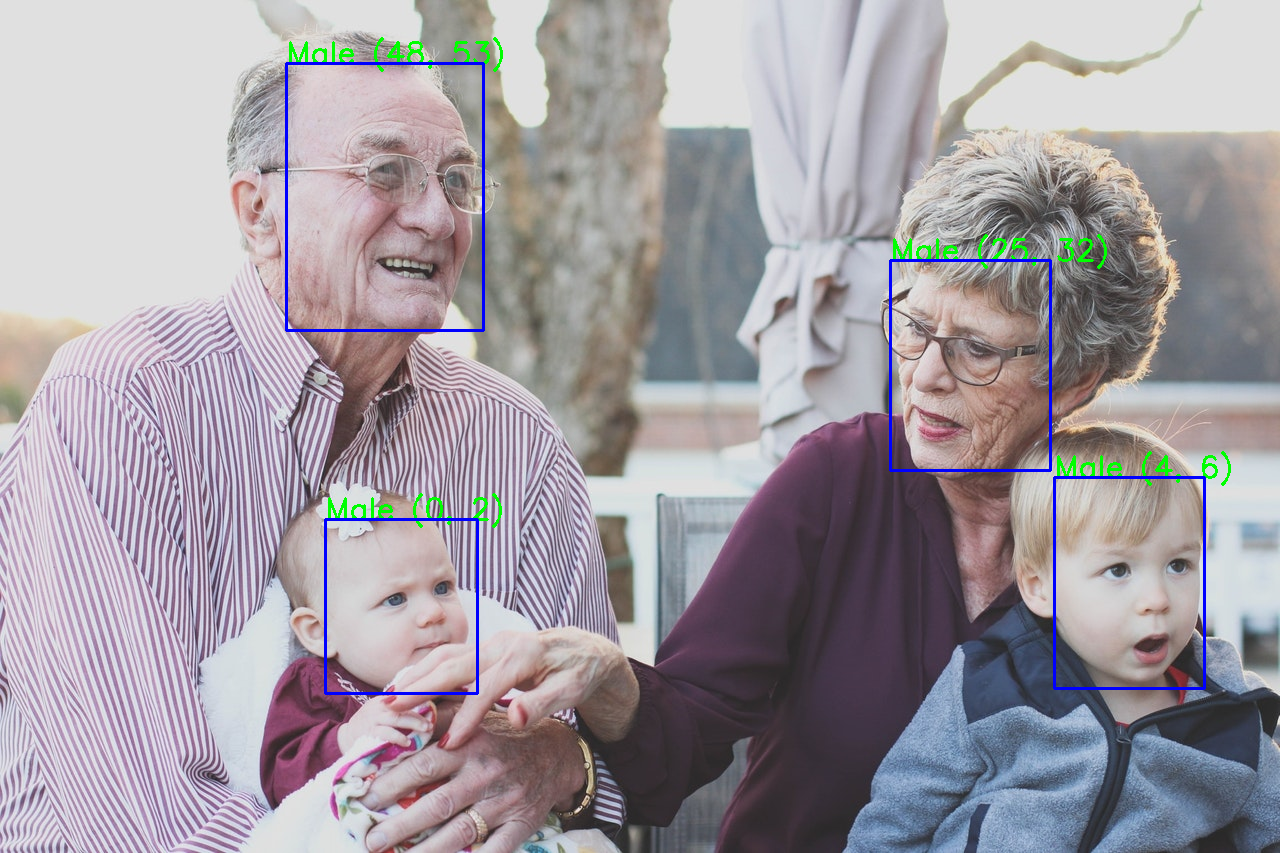

In [6]:
print('result')
cv2_imshow(img)
# cv2.imshow('result', img)
# cv2.waitKey(0)